In [1]:
from scapy.all import IP, TCP, PcapReader
from collections import defaultdict
import matplotlib.pyplot as plt
import time
import numpy as np
import statistics
from scipy.stats import skew, kurtosis
import math
import os
# Set the pcap file path and file names
directory_path = "E:/CICDDoS2019/Dataset/PCAPs/01-12/"
pcap_files=['SAT-01-12-2018_0.pcap']
#pcap_files=['SAT-01-12-2018_0','SAT-01-12-2018_01','SAT-01-12-2018_02','SAT-01-12-2018_03','SAT-01-12-2018_04','SAT-01-12-2018_05','SAT-01-12-2018_06','SAT-01-12-2018_07','SAT-01-12-2018_08','SAT-01-12-2018_09']
#pcap_files=['SAT-01-12-2018_0250', 'SAT-01-12-2018_0251', 'SAT-01-12-2018_0252', 'SAT-01-12-2018_0253', 'SAT-01-12-2018_0254', 'SAT-01-12-2018_0255', 'SAT-01-12-2018_0256', 'SAT-01-12-2018_0257', 'SAT-01-12-2018_0258', 'SAT-01-12-2018_0259', 'SAT-01-12-2018_0260', 'SAT-01-12-2018_0261', 'SAT-01-12-2018_0262', 'SAT-01-12-2018_0263', 'SAT-01-12-2018_0264', 'SAT-01-12-2018_0265', 'SAT-01-12-2018_0266', 'SAT-01-12-2018_0267', 'SAT-01-12-2018_0268', 'SAT-01-12-2018_0269', 'SAT-01-12-2018_0270', 'SAT-01-12-2018_0271', 'SAT-01-12-2018_0272', 'SAT-01-12-2018_0273', 'SAT-01-12-2018_0274', 'SAT-01-12-2018_0275', 'SAT-01-12-2018_0276', 'SAT-01-12-2018_0277', 'SAT-01-12-2018_0278', 'SAT-01-12-2018_0279', 'SAT-01-12-2018_0280', 'SAT-01-12-2018_0281', 'SAT-01-12-2018_0282', 'SAT-01-12-2018_0283', 'SAT-01-12-2018_0284', 'SAT-01-12-2018_0285', 'SAT-01-12-2018_0286', 'SAT-01-12-2018_0287', 'SAT-01-12-2018_0288', 'SAT-01-12-2018_0289', 'SAT-01-12-2018_0290', 'SAT-01-12-2018_0291', 'SAT-01-12-2018_0292', 'SAT-01-12-2018_0293', 'SAT-01-12-2018_0294', 'SAT-01-12-2018_0295', 'SAT-01-12-2018_0296', 'SAT-01-12-2018_0297', 'SAT-01-12-2018_0298', 'SAT-01-12-2018_0299', 'SAT-01-12-2018_0300', 'SAT-01-12-2018_0301', 'SAT-01-12-2018_0302', 'SAT-01-12-2018_0303', 'SAT-01-12-2018_0304', 'SAT-01-12-2018_0305', 'SAT-01-12-2018_0306', 'SAT-01-12-2018_0307', 'SAT-01-12-2018_0308', 'SAT-01-12-2018_0309', 'SAT-01-12-2018_0310', 'SAT-01-12-2018_0311', 'SAT-01-12-2018_0312', 'SAT-01-12-2018_0313', 'SAT-01-12-2018_0314', 'SAT-01-12-2018_0315', 'SAT-01-12-2018_0316', 'SAT-01-12-2018_0317', 'SAT-01-12-2018_0318', 'SAT-01-12-2018_0319', 'SAT-01-12-2018_0320', 'SAT-01-12-2018_0321', 'SAT-01-12-2018_0322', 'SAT-01-12-2018_0323', 'SAT-01-12-2018_0324', 'SAT-01-12-2018_0325', 'SAT-01-12-2018_0326', 'SAT-01-12-2018_0327', 'SAT-01-12-2018_0328', 'SAT-01-12-2018_0329', 'SAT-01-12-2018_0330', 'SAT-01-12-2018_0331', 'SAT-01-12-2018_0332', 'SAT-01-12-2018_0333', 'SAT-01-12-2018_0334', 'SAT-01-12-2018_0335', 'SAT-01-12-2018_0336', 'SAT-01-12-2018_0337', 'SAT-01-12-2018_0338', 'SAT-01-12-2018_0339', 'SAT-01-12-2018_0340', 'SAT-01-12-2018_0341', 'SAT-01-12-2018_0342', 'SAT-01-12-2018_0343', 'SAT-01-12-2018_0344', 'SAT-01-12-2018_0345', 'SAT-01-12-2018_0346', 'SAT-01-12-2018_0347', 'SAT-01-12-2018_0348', 'SAT-01-12-2018_0349', 'SAT-01-12-2018_0350', 'SAT-01-12-2018_0351', 'SAT-01-12-2018_0352', 'SAT-01-12-2018_0353', 'SAT-01-12-2018_0354', 'SAT-01-12-2018_0355', 'SAT-01-12-2018_0356', 'SAT-01-12-2018_0357', 'SAT-01-12-2018_0358', 'SAT-01-12-2018_0359', 'SAT-01-12-2018_0360', 'SAT-01-12-2018_0361', 'SAT-01-12-2018_0362', 'SAT-01-12-2018_0363', 'SAT-01-12-2018_0364', 'SAT-01-12-2018_0365', 'SAT-01-12-2018_0366', 'SAT-01-12-2018_0367', 'SAT-01-12-2018_0368', 'SAT-01-12-2018_0369', 'SAT-01-12-2018_0370', 'SAT-01-12-2018_0371', 'SAT-01-12-2018_0372', 'SAT-01-12-2018_0373', 'SAT-01-12-2018_0374', 'SAT-01-12-2018_0375', 'SAT-01-12-2018_0376', 'SAT-01-12-2018_0377', 'SAT-01-12-2018_0378', 'SAT-01-12-2018_0379', 'SAT-01-12-2018_0380', 'SAT-01-12-2018_0381', 'SAT-01-12-2018_0382', 'SAT-01-12-2018_0383', 'SAT-01-12-2018_0384', 'SAT-01-12-2018_0385', 'SAT-01-12-2018_0386', 'SAT-01-12-2018_0387', 'SAT-01-12-2018_0388', 'SAT-01-12-2018_0389', 'SAT-01-12-2018_0390', 'SAT-01-12-2018_0391', 'SAT-01-12-2018_0392', 'SAT-01-12-2018_0393', 'SAT-01-12-2018_0394', 'SAT-01-12-2018_0395', 'SAT-01-12-2018_0396', 'SAT-01-12-2018_0397', 'SAT-01-12-2018_0398', 'SAT-01-12-2018_0399', 'SAT-01-12-2018_0400', 'SAT-01-12-2018_0401', 'SAT-01-12-2018_0402', 'SAT-01-12-2018_0403', 'SAT-01-12-2018_0404', 'SAT-01-12-2018_0405', 'SAT-01-12-2018_0406', 'SAT-01-12-2018_0407', 'SAT-01-12-2018_0408', 'SAT-01-12-2018_0409', 'SAT-01-12-2018_0410', 'SAT-01-12-2018_0411', 'SAT-01-12-2018_0412', 'SAT-01-12-2018_0413', 'SAT-01-12-2018_0414', 'SAT-01-12-2018_0415', 'SAT-01-12-2018_0416', 'SAT-01-12-2018_0417', 'SAT-01-12-2018_0418', 'SAT-01-12-2018_0419', 'SAT-01-12-2018_0420', 'SAT-01-12-2018_0421', 'SAT-01-12-2018_0422', 'SAT-01-12-2018_0423', 'SAT-01-12-2018_0424', 'SAT-01-12-2018_0425', 'SAT-01-12-2018_0426', 'SAT-01-12-2018_0427', 'SAT-01-12-2018_0428', 'SAT-01-12-2018_0429', 'SAT-01-12-2018_0430', 'SAT-01-12-2018_0431', 'SAT-01-12-2018_0432', 'SAT-01-12-2018_0433', 'SAT-01-12-2018_0434', 'SAT-01-12-2018_0435', 'SAT-01-12-2018_0436', 'SAT-01-12-2018_0437', 'SAT-01-12-2018_0438', 'SAT-01-12-2018_0439', 'SAT-01-12-2018_0440', 'SAT-01-12-2018_0441', 'SAT-01-12-2018_0442', 'SAT-01-12-2018_0443', 'SAT-01-12-2018_0444', 'SAT-01-12-2018_0445', 'SAT-01-12-2018_0446', 'SAT-01-12-2018_0447', 'SAT-01-12-2018_0448', 'SAT-01-12-2018_0449', 'SAT-01-12-2018_0450', 'SAT-01-12-2018_0451', 'SAT-01-12-2018_0452', 'SAT-01-12-2018_0453', 'SAT-01-12-2018_0454', 'SAT-01-12-2018_0455', 'SAT-01-12-2018_0456', 'SAT-01-12-2018_0457', 'SAT-01-12-2018_0458', 'SAT-01-12-2018_0459', 'SAT-01-12-2018_0460', 'SAT-01-12-2018_0461', 'SAT-01-12-2018_0462', 'SAT-01-12-2018_0463', 'SAT-01-12-2018_0464', 'SAT-01-12-2018_0465', 'SAT-01-12-2018_0466', 'SAT-01-12-2018_0467', 'SAT-01-12-2018_0468', 'SAT-01-12-2018_0469', 'SAT-01-12-2018_0470', 'SAT-01-12-2018_0471', 'SAT-01-12-2018_0472', 'SAT-01-12-2018_0473', 'SAT-01-12-2018_0474', 'SAT-01-12-2018_0475', 'SAT-01-12-2018_0476', 'SAT-01-12-2018_0477', 'SAT-01-12-2018_0478', 'SAT-01-12-2018_0479', 'SAT-01-12-2018_0480', 'SAT-01-12-2018_0481', 'SAT-01-12-2018_0482', 'SAT-01-12-2018_0483', 'SAT-01-12-2018_0484', 'SAT-01-12-2018_0485', 'SAT-01-12-2018_0486', 'SAT-01-12-2018_0487', 'SAT-01-12-2018_0488', 'SAT-01-12-2018_0489', 'SAT-01-12-2018_0490', 'SAT-01-12-2018_0491', 'SAT-01-12-2018_0492', 'SAT-01-12-2018_0493', 'SAT-01-12-2018_0494', 'SAT-01-12-2018_0495', 'SAT-01-12-2018_0496', 'SAT-01-12-2018_0497', 'SAT-01-12-2018_0498', 'SAT-01-12-2018_0499']


# Define the time interval delta_T in seconds
delta_T = 10
#Entropy
import math
# The input is the list of frequency count
def norm_entropy(freq_counts):
    total_count = sum( freq_counts)
    probabilities = [count / total_count for count in freq_counts]
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy -= prob * math.log(prob, 2)
    #normalize the entropy
    distinct_count=len(freq_counts)
    #just in case only one distinct count
    if (distinct_count<=1):
        entropy_norm=0
    else:
        entropy_norm=entropy/math.log(distinct_count, 2)
    return entropy_norm
# the list of data contain the original elements    
def raw_entropy(data):
    """Compute the entropy of a list of integers"""
    if not data:
        return 0
    counts = {}
    for value in data:
        counts[value] = counts.get(value, 0) + 1
    probs = [float(c) / len(data) for c in counts.values()]
    entropy_raw=-sum(p * math.log(p, 2) for p in probs)
    return entropy_raw
##########
# Create a dictionary to count packets and distinct IP addresses
##########
packet_count = 0
ip_packet_count =0
ip_count_src = []
ip_count_dest = []
ip_packet_counts = []
average_IATs=[]
IAT_list_deltaT=[]
IAT_list_deltaT_stds=[]
IAT_list_deltaT_skews=[]
IAT_list_deltaT_kurts=[]
sum_iat=0
ip_count_src = defaultdict(int)
ip_count_dest = defaultdict(int)

#for entropy
freq_count_src=[]
freq_count_dest=[]

ip_counts_distinct_src = []
ip_counts_distinct_dest = []
F2_srcIPs= []
F2_destIPs= []
time_stamps = []
#IPLength
average_packet_lengths = []
sum_pkt_length=0

#Protocols
ICMP_percentages=[]
TCP_percentages=[]
UDP_percentages=[]
icmp_count=0
tcp_count=0
udp_count=0
#
# Initialize TCP syn fin counters
syn_count = 0
fin_count = 0
syn_counts = []
fin_counts = []
#
entropys_srcIP=[]
entropys_destIP=[]
#
current_time = 0
previous_time= 0
start_time = 0
#
# Load the pcap files
# using PcapReader
for pp in pcap_files:
    # Concatenate the directory path and file name
    pcap_file = directory_path + pp
    packets = PcapReader(pcap_file)
    print("Reading file\n", pcap_file)
      
    # Loop through all packets and count the number of packets and distinct IPs for each time interval
    for packet in packets:
        if (packet_count==0):
                # Initialize the start time to the timestamp of the first packet
                # Get the first packet in the pcap file
                current_time = packet.time
                previous_time= packet.time
                start_time = packet.time
        else:
                previous_time= current_time
                current_time = packet.time
        packet_count += 1
        if IP in packet:
            ip_packet_count += 1
            ip_count_src[packet[IP].src] += 1
            ip_count_dest[packet[IP].dst] += 1
            
            iat=current_time-previous_time
            #put IAT in a list to compute std, skew and kurt
            IAT_list_deltaT.append(float(iat) )
            sum_iat=sum_iat+iat
            #the value of the len field of the IP layer. It does not contain the Ether layer (14 bytes).
            packet_length = packet[IP].len
            sum_pkt_length=sum_pkt_length+packet_length
            #Protocol
            ip_proto= packet[IP].proto
            if (ip_proto==1):
                icmp_count=icmp_count+1
            elif (ip_proto==6):
                tcp_count=tcp_count+1
            elif (ip_proto==17):
                udp_count=udp_count+1
            #
            #count TCP syn and fin packet
            if TCP in packet:
                # Check if the SYN flag is set
                if packet[TCP].flags & 0x02:
                    syn_count += 1
                # Check if the FIN flag is set
                if packet[TCP].flags & 0x01:
                    fin_count += 1
            ##
            previous_time=current_time
            #update after computing IAT 
        if ((current_time - start_time >= delta_T)):
            start_time = current_time
            #only update start time as delta_T 
            ip_packet_counts.append(ip_packet_count)
            ip_counts_distinct_src.append(len(ip_count_src))
            ip_counts_distinct_dest.append(len(ip_count_dest))
            time_stamps.append(start_time)
            #record the packet length
            #Protocols
            #Just in case the ip_count is 0 for a
            #very small observation time
            if (ip_packet_count!=0):
                average_packet_lengths.append(sum_pkt_length/ip_packet_count)
                ICMP_percentages.append(icmp_count/ip_packet_count)
                TCP_percentages.append(tcp_count/ip_packet_count)
                UDP_percentages.append(udp_count/ip_packet_count)
                # Average IAT for delta_time
                average_IATs.append(sum_iat/ip_packet_count)
            else:
                average_packet_lengths.append(0)
                ICMP_percentages.append(0)
                TCP_percentages.append(0)
                UDP_percentages.append(0)
                # Average IAT for delta_time
                average_IATs.append(0)
            #print(f"Observation time: {start_time:.6f} - {current_time:.6f}")
            #print(f"Packet count: {packet_count}")
            #print(f"Distinct IP count: {len(ip_count)}")
            #print()
            
            if (len(IAT_list_deltaT)<2):
                IAT_list_deltaT_stds.append(0)
                IAT_list_deltaT_skews.append(0)
                IAT_list_deltaT_kurts.append(0)
            else:
                IAT_list_deltaT_stds.append(statistics.variance(IAT_list_deltaT)**0.5)
                #convert decimal format into float
                IAT_floats = [float(a) for a in IAT_list_deltaT]
                IAT_list_deltaT_skews.append(skew(IAT_floats))
                IAT_list_deltaT_kurts.append(kurtosis(IAT_floats))
            
            # Calculate the second moment of the packet counts for each IP address
            # Normalized to packet_count^2
            if (ip_packet_count!=0):    
                second_freq_moment_srcIP = sum(count1**2 for count1 in ip_count_src.values())/ip_packet_count**2
                second_freq_moment_destIP = sum(count2**2 for count2 in ip_count_dest.values())/ip_packet_count**2
                F2_srcIPs.append(second_freq_moment_srcIP)
                F2_destIPs.append(second_freq_moment_destIP)
            else:
                F2_srcIPs.append(0)
                F2_destIPs.append(0)
            #Entropy
            #freq_count_src.append(freq1 for freq1 in ip_count_src.values())
            #freq_count_dest.append(freq2 for freq2 in ip_count_dest.values())
            entropys_srcIP.append(norm_entropy(ip_count_src.values()))
            entropys_destIP.append(norm_entropy(ip_count_dest.values()))
            #
            syn_counts.append(syn_count)
            fin_counts.append(fin_count)
            # Reset the counters and update the start time
            # Statistics in observation time
            ip_packet_count = 0
            sum_iat=0
            sum_pkt_length=0
            icmp_count=0
            tcp_count=0
            udp_count=0
            ip_count_src = defaultdict(int)
            ip_count_dest = defaultdict(int)
            syn_count = 0
            fin_count = 0
            
            #this IAT list is only valid for one deltaT
            IAT_list_deltaT=[]


Reading file
 E:/CICDDoS2019/Dataset/PCAPs/01-12/SAT-01-12-2018_0.pcap


In [ ]:
with open('202201101400_500MB_dt1_2_proto_syn.txt', 'w') as f:
    for item1, item2,item3, item4,item5, item6,item7, item8,item9, item10,item11,item12, item13,item14,item15,item16,item17 in zip(time_stamps, ip_packet_counts, ip_counts_distinct_src,ip_counts_distinct_dest,F2_srcIPs,F2_destIPs, average_IATs,IAT_list_deltaT_skews,IAT_list_deltaT_kurts,entropys_srcIP, entropys_destIP,average_packet_lengths,ICMP_percentages,TCP_percentages,UDP_percentages,syn_counts,fin_counts):
            f.write(f"{item1}\t{item2}\t{item3}\t{item4}\t{item5}\t{item6}\t{item7}\t{item8}\t{item8}\t{item9}\t{item10}\t{item11}\t{item12}\t{item13}\t{item14}\t{item15}\t{item16}\t{item17}\n")
        #### close the file
f.close()

C:\Users\ylai\AppData\Local\Temp\ipykernel_33004\1712283251.py:5: DeprecationWarning: an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  times = [datetime.fromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp


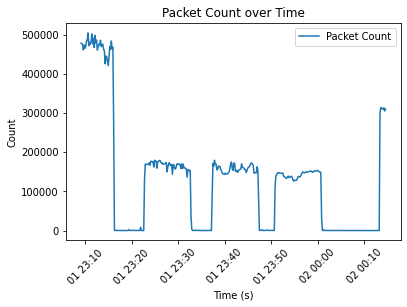

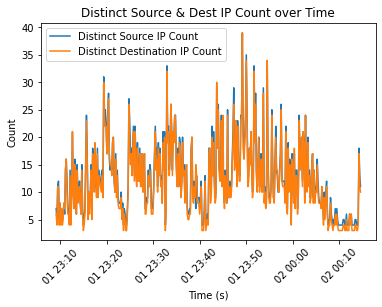

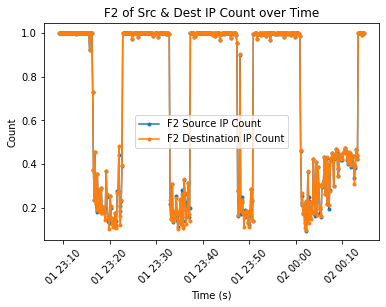

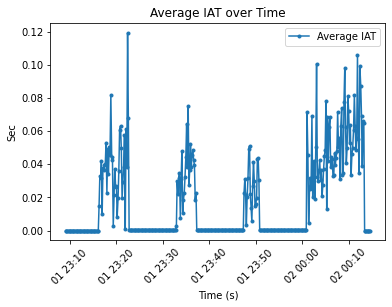

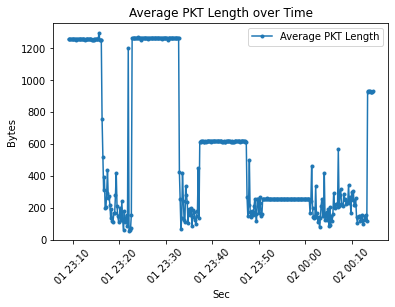

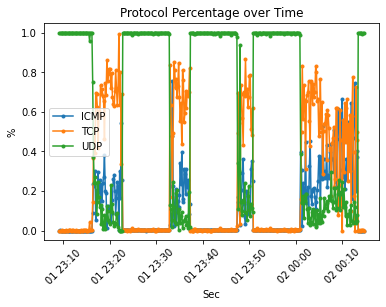

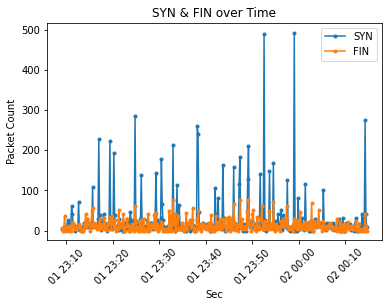

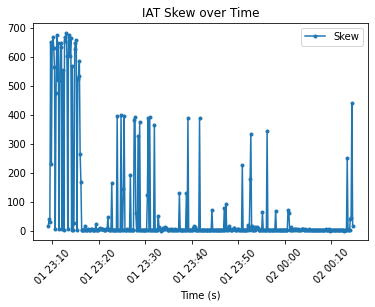

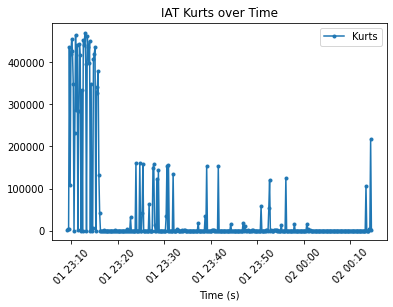

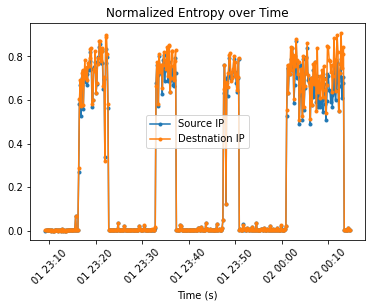

In [ ]:
from datetime import datetime
# Convert seconds to datetime objects
#time_format = "%H:%M:%S"
#times = [datetime.utcfromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp
times = [datetime.fromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp


# Plot the packet count using matplotlib
plt.plot(times, ip_packet_counts, label='Packet Count')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Packet Count over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
# Plot the source IP count using matplotlib
plt.plot(times, ip_counts_distinct_src, label='Distinct Source IP Count')
plt.plot(times, ip_counts_distinct_dest, label='Distinct Destination IP Count')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Distinct Source & Dest IP Count over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

#Plot F2 of Src and Dest IPs
plt.plot(times, F2_srcIPs, label='F2 Source IP Count',marker=".")
plt.plot(times, F2_destIPs, label='F2 Destination IP Count',marker=".")
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('F2 of Src & Dest IP Count over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

#Plot average IAT
plt.plot(times, average_IATs, label='Average IAT',marker=".")
plt.xlabel('Time (s)')
plt.ylabel('Sec')
plt.title('Average IAT over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#Plot Average packet length
plt.plot(times, average_packet_lengths, label='Average PKT Length',marker=".")
plt.xlabel('Sec')
plt.ylabel('Bytes')
plt.title('Average PKT Length over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#Plot Protocol Percentage
plt.plot(times, ICMP_percentages, label='ICMP',marker=".")
plt.plot(times, TCP_percentages, label='TCP',marker=".")
plt.plot(times, UDP_percentages, label='UDP',marker=".")
plt.xlabel('Sec')
plt.ylabel('%')
plt.title('Protocol Percentage over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#Plot Syn FIN
plt.plot(times, syn_counts, label='SYN',marker=".")
plt.plot(times, fin_counts, label='FIN',marker=".")
plt.xlabel('Sec')
plt.ylabel('Packet Count')
plt.title('SYN & FIN over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

#Plot average IAT mean, stdv
#plt.errorbar(time_stamps, average_IATs, IAT_list_deltaT_stds, linestyle='None', marker='^')
#plt.xlabel('Time (s)')
#plt.ylabel('Sec')
#plt.title('Average IAT over Time')
#plt.legend()
#plt.show()

#Plot average IAT skew 
plt.plot(times, IAT_list_deltaT_skews, label='Skew',marker=".")
plt.xlabel('Time (s)')
#plt.ylabel('Sec')
plt.title('IAT Skew over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#Plot average IAT Kurt
plt.plot(times, IAT_list_deltaT_kurts, label='Kurts',marker=".")
plt.xlabel('Time (s)')
plt.title('IAT Kurts over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#Plot Entropy
plt.plot(times, entropys_srcIP, label='Source IP',marker=".")
plt.plot(times, entropys_destIP, label='Destnation IP',marker=".")
plt.xlabel('Time (s)')
#plt.ylabel('Sec')
plt.title('Normalized Entropy over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


C:\Users\ylai\AppData\Local\Temp\ipykernel_33004\3742777075.py:5: DeprecationWarning: an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  times = [datetime.fromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp


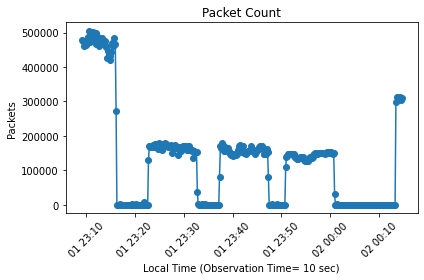

In [ ]:
from datetime import datetime
# Convert seconds to datetime objects
#time_format = "%H:%M:%S"
#times = [datetime.utcfromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp
times = [datetime.fromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp
# Plot
plt.plot(times, ip_packet_counts, marker='o')
plt.xlabel(f'Local Time (Observation Time= {delta_T} sec)')
plt.ylabel('Packets')
plt.title('Packet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

C:\Users\ylai\AppData\Local\Temp\ipykernel_33004\146310597.py:4: DeprecationWarning: an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  times = [datetime.utcfromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp


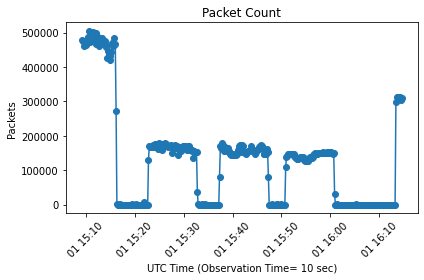

In [ ]:
# Plot the packet count using matplotlib
# Convert seconds to datetime objects
#time_format = "%H:%M:%S"
times = [datetime.utcfromtimestamp(sec) for sec in time_stamps]  # Assuming seconds are UTC timestamp
# Plot
plt.plot(times, ip_packet_counts, marker='o')
plt.xlabel(f'UTC Time (Observation Time= {delta_T} sec)')
plt.ylabel('Packets')
plt.title('Packet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()